# Analysis on soccer matches offered by sportsbooks such as Bet365, Pinnacle, Oddsportal

In [10]:
import numpy as np 
import pandas as pd 

# Descriptions of all columns

# id: game id on Oddsportal
# timestamp: when the game started
# liga_id: id to correlate with leagues.csv file
# home: home team
# away: away team name
# score_h: goals scored by home team
# score_a: goals scored by away team
# m_o1: AVG odds of home team moneyline
# m_oX: AVG odds for draw 
# m_o2: AVG odds for away team moneyline

In [12]:
df=pd.read_csv('matches.csv').dropna()

df

,id,timestamp,liga_id,home,away,score_h,score_a,m_o1,m_oX,m_o2,...,b_o2,p_o1,p_oX,p_o2,m_oO,m_oU,b_oO,b_oU,p_oO,p_oU
0,0001QvfT,1553958000,1923,Brighton,Southampton,0,1,2.53,3.10,3.12,...,3.10,2.56,3.08,3.27,2.34,1.60,2.30,1.61,2.43,1.62
1,000e1BLc,1538308800,1619,Esbjerg,Aarhus,0,0,2.94,3.23,2.39,...,2.37,3.04,3.30,2.51,1.97,1.82,1.95,1.85,2.02,1.85
2,000jRrlA,1440342000,1477,Brno,Jablonec,0,3,3.87,3.37,1.89,...,1.85,4.23,3.61,1.95,1.96,1.78,2.05,1.75,2.06,1.84
3,000leJL4,1635019200,807,Juventude,Ceara,0,0,2.72,2.86,2.85,...,2.75,2.94,2.93,2.85,2.78,1.43,2.87,1.40,2.87,1.44
4,000n2DhS,1258815600,1980,West Brom,Bristol City,4,1,1.63,3.59,5.29,...,5.50,1.65,4.04,5.89,1.84,1.92,1.85,1.95,1.92,1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377620,zZz5vqBe,1530453600,5199,Jelgava,Metta/LU,1,0,1.56,3.68,5.38,...,6.00,1.55,3.96,6.00,1.98,1.73,2.04,1.75,1.97,1.83
377622,zZZB3Bx4,1325880900,6222,Vitoria Setubal,Academica,1,1,2.89,3.01,2.42,...,2.50,3.04,3.22,2.58,2.32,1.54,2.35,1.57,2.44,1.60
377623,zZzEZij8,1509195600,3052,Reims,Nancy,3,0,1.96,3.16,4.01,...,4.00,2.08,3.22,4.27,2.25,1.61,2.29,1.60,2.39,1.62
377625,zZznuBMh,1540044000,2493,Bury,Notts Co,4,0,1.78,3.75,4.26,...,4.50,1.80,3.84,4.56,1.74,2.04,1.72,2.07,1.75,2.15


### Choosing the type of bet to make

What happens if you bet every single game? Expecting negativge ROI because the house always wins

,ROI
Avg Home,-0.073101
Avg Draw,-0.087178
Avg Away,-0.109947
Avg Over2.5,-0.071966
Avg Under2.5,-0.065084
Bet365 Home,-0.064531
Bet365 Draw,-0.065959
Bet365 Away,-0.084961
Bet365 Over2.5,-0.057896
Bet365 Under2.5,-0.057091


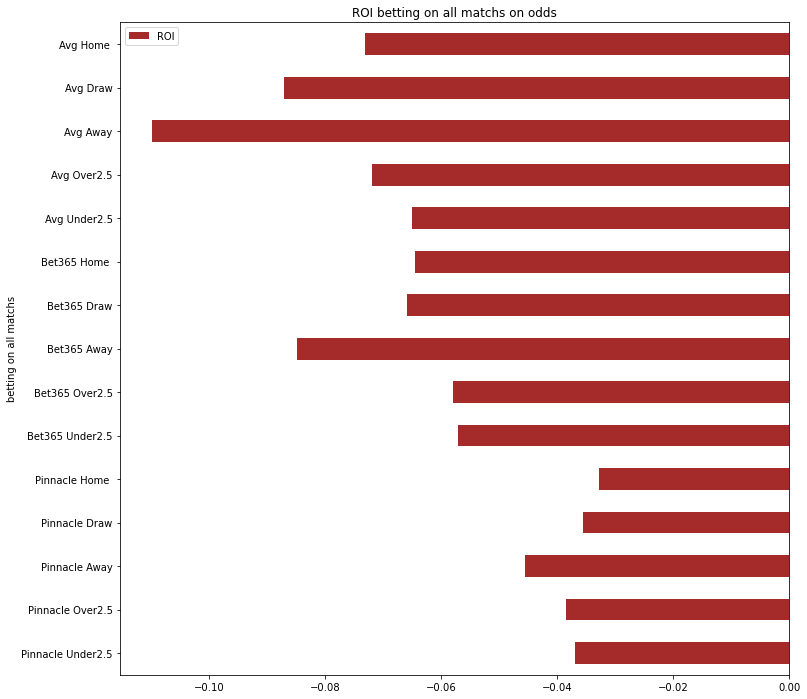

In [13]:

df_roi=pd.DataFrame({'ROI':[
    np.where(df.score_h >  df.score_a, df.m_o1-1, -1).mean(),
    np.where(df.score_h == df.score_a, df.m_oX-1, -1).mean(),
    np.where(df.score_h <  df.score_a, df.m_o2-1, -1).mean(),
    np.where(df.score_h +  df.score_a>2.5, df.m_oO-1, -1).mean(),
    np.where(df.score_h +  df.score_a<2.5, df.m_oU-1, -1).mean(),
    
    np.where(df.score_h >  df.score_a, df.b_o1-1, -1).mean(),
    np.where(df.score_h == df.score_a, df.b_oX-1, -1).mean(),
    np.where(df.score_h <  df.score_a, df.b_o2-1, -1).mean(),
    np.where(df.score_h +  df.score_a>2.5, df.b_oO-1, -1).mean(),
    np.where(df.score_h +  df.score_a<2.5, df.b_oU-1, -1).mean(),
    
    np.where(df.score_h >  df.score_a, df.p_o1-1, -1).mean(),
    np.where(df.score_h == df.score_a, df.p_oX-1, -1).mean(),
    np.where(df.score_h <  df.score_a, df.p_o2-1, -1).mean(),
    np.where(df.score_h +  df.score_a>2.5, df.p_oO-1, -1).mean(),
    np.where(df.score_h +  df.score_a<2.5, df.p_oU-1, -1).mean()
    
]}, index=[
    'Avg Home ',
    'Avg Draw',
    'Avg Away',
    'Avg Over2.5',
    'Avg Under2.5',
    
    'Bet365 Home ',
    'Bet365 Draw',
    'Bet365 Away',
    'Bet365 Over2.5',
    'Bet365 Under2.5',
    
    'Pinnacle Home ',
    'Pinnacle Draw',
    'Pinnacle Away',
    'Pinnacle Over2.5',
    'Pinnacle Under2.5',
       
])



df_roi[::-1].plot(
    kind='barh',color='brown',
    xlabel='betting on all matchs',
    title='ROI betting on all matchs on odds',
    figsize=(12,12),
)

df_roi


# ROI = -3.28%. On average, for every 100 dollars bet, we lose 3.28 dollars

### Run Linear Regression to estimate ROI for each bet from available odds

In [14]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

#odds for home available on Bet365
X=df[['m_o1','b_o1','p_o1'] ]

#Y is the return obtained from betting on the home team to win at Pinnacle.
Y=np.where(df.score_h >  df.score_a, df.p_o1-1, -1)


#Data becomes 25% testing, 75% training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

print('X_train:')
display(X_train)

print('Y_train:')
display(Y_train)

X_train:


,m_o1,b_o1,p_o1
135269,8.39,9.50,8.04
71983,3.08,3.10,3.22
292726,1.76,1.70,1.84
239133,2.40,2.37,2.53
38344,2.54,2.63,2.96
...,...,...,...
373410,1.61,1.29,1.28
149062,1.46,1.45,1.49
189962,3.11,3.30,3.38
211585,2.02,2.00,2.00


Y_train:


array([-1.  , -1.  , -1.  , ..., -1.  ,  1.  ,  0.92])

In [15]:
#Training model
reg = LinearRegression().fit(X_train, Y_train)

#Make predictions
Y_pred=reg.predict(X_test)

#Bet only on games with ROI > 0%
profit = np.mean([y  for y_pred, y in zip(Y_pred, Y_test)  if y_pred>0])
profit

0.7484999999999999

Instead of betting on every game, if we just bet on positive ROI games, we can profit 74.8 percent

In [18]:
#Absolute return in units
units_won = np.sum([y  for y_pred, y in zip(Y_pred, Y_test)  if y_pred>0])
units_won

14.969999999999999